# Celebrity Face's

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix,classification_report

## Let's explore our data
### we have three folders named train,test,valid
* In our data, we have only 10 person images
* we will use data in train folder to train model
* then make model more superior by using validation data
* or we can also combine train and test data to get more data

## In this We have combined train and test data

### let's first collect train data

In [2]:
path_to_our_data_train='Celebrity/train'
path_to_our_valid_data='Celebrity/valid'

In [3]:
# Names of persons in our data set or name of folder , Here We have 10 folders.
Labels=os.listdir(path_to_our_data_train)
Labels  # array of person's name

['Brad',
 'Daniel',
 'Elon',
 'Ema',
 'Emilia',
 'Maisie',
 'Obama',
 'Tom',
 'Trump',
 'Zuckerberg']

### For simplicity we will not train whole image, we will only train faces and for that we will detect face in image and then crop it using openCV

In [4]:
# Funtion to detect and crop face from each photo
def crop_face(imagePath):  # Just need  path of Image which we want to crop
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faceCascade = face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # change path 
    # Detect Face
    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
    )            
    # Crop it and return color Image in ROI variable
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_color = image[y:y + h, x:x + w]
    return roi_color

### Getting Data, Funtion to convert images in array format

In [5]:
img_size=100
def get_data(data_dir): # just we have to pass directory to our data
    data = [] 
    for label in Labels:    # Labels is just array of names of person, we defined it above
        path = os.path.join(data_dir, label)     #'path_to_dir/name_of_person' it contains all photos of that person
        class_num = Labels.index(label)    # number_corrosponds_to_that_label
        for img in os.listdir(path):    # loop to all images in particular folder(person)
            try:
                img_arr=crop_face(os.path.join(path, img))
                
                # Converting coloured cropped face into black and white
                rgb_weights = [0.2989, 0.5870, 0.1140]
                img_arr = np.dot(img_arr[...,:3], rgb_weights)
                
            
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Resizing images to preferred size (150)
                data.append([resized_arr, class_num,label]) #appending every image array to 'data' list
            except Exception as e:
                print(e)
    return np.array(data)  # returning to main program


In [6]:
#Getting trained Data in train_data variable
#this takes time to run
train_data=get_data(path_to_our_data_train)
valid_data=get_data(path_to_our_valid_data)

local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before assignment
local variable 'roi_color' referenced before ass

In [7]:
# Converting Data into DataFrame
DF_train=pd.DataFrame(train_data)
DF_valid=pd.DataFrame(valid_data)

In [8]:
# Changine Name of columns of data frame
DF_train.rename(columns = {0: "Images_array", 
                     1:"Label",
                     2:"Label_name"},
                     inplace = True) 
DF_valid.rename(columns = {0: "Images_array", 
                     1:"Label",
                     2:"Label_name"},
                     inplace = True) 
DF_train
DF_valid

,Images_array,Label,Label_name
0,"[[149.685, 149.685, 149.685, 149.685, 149.685,...",0,Brad
1,"[[149.685, 149.685, 149.685, 149.685, 149.685,...",0,Brad
2,"[[149.685, 149.685, 149.685, 149.685, 149.685,...",0,Brad
3,"[[149.685, 149.685, 149.685, 149.685, 149.685,...",0,Brad
4,"[[149.685, 149.685, 149.685, 149.685, 149.685,...",0,Brad
...,...,...,...
168,"[[149.685, 149.685, 149.685, 149.685, 149.685,...",9,Zuckerberg
169,"[[149.685, 149.685, 149.685, 149.685, 149.685,...",9,Zuckerberg
170,"[[149.685, 149.685, 149.685, 149.685, 149.685,...",9,Zuckerberg
171,"[[149.685, 149.685, 149.685, 149.685, 149.685,...",9,Zuckerberg


### Plotting any image just for sample

(100, 100)

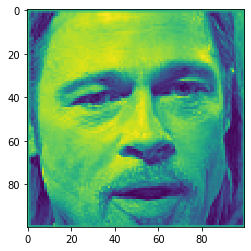

In [9]:
plt.imshow(DF_train['Images_array'][78]) # You can change index
DF_train["Images_array"][0].shape

## We Have training data of 100*100 pixel each image and total no. of images are 978
### Let's Split train and valid data into X and Y and reshape our data into 3D ,bcoz CNN takes only 3D image as input

In [10]:
X_train=[]
X_valid=[]
#loop for train data
for i in DF_train['Images_array']:
    X_train.append(i)
X_train=np.array(X_train)    
#Reshape
X_train=X_train.reshape(970,img_size,img_size,1)

# Loop for Validation Data
for i in DF_valid['Images_array']:
    X_valid.append(i)
X_valid=np.array(X_valid)    
#Reshape
X_valid=X_valid.reshape(173,img_size,img_size,1)

In [11]:
#Getting Label for train
Y_train=DF_train['Label']
Y_train=np.array(Y_train)
#Getting Label for valid
Y_valid=DF_valid['Label']
Y_valid=np.array(Y_valid)

### Normalisation (even you can try without it)


In [12]:
X_train=X_train/255.0
X_valid=X_valid/255.0


### Just Mapping every Label with names in dictionary (Just for fun ;))

In [13]:
Label_names=pd.DataFrame(DF_train['Label'])
Label_names['Name']=DF_train['Label_name']
index=Label_names['Label'].unique()
names=Label_names['Name'].unique()
dictionary={}
for i,n in zip(index,names):
    dictionary[i]=n
dictionary    

{0: 'Brad',
 1: 'Daniel',
 2: 'Elon',
 3: 'Ema',
 4: 'Emilia',
 5: 'Maisie',
 6: 'Obama',
 7: 'Tom',
 8: 'Trump',
 9: 'Zuckerberg'}

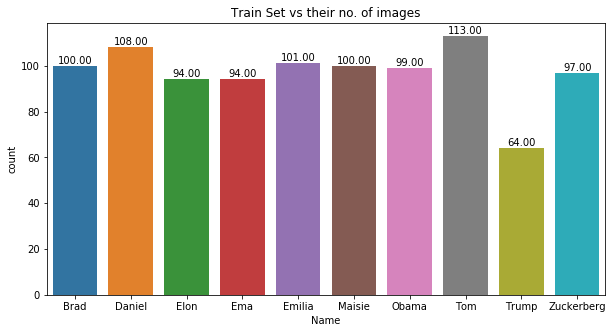

In [14]:
# Plotting Train Data
plt.figure(figsize=(10,5))
plt.title('Train Set vs their no. of images')
ax=sns.countplot(Label_names['Name'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +1,
            '{:1.2f}'.format(height),
            ha="center")

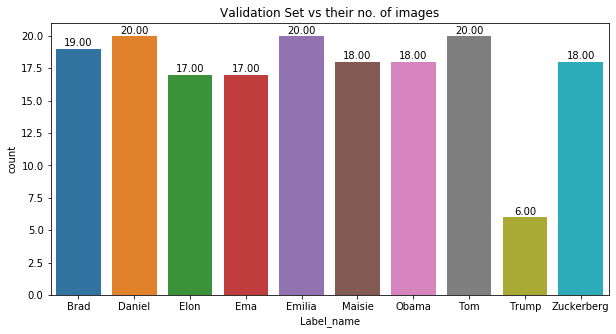

In [15]:
#Plotting Validation Data
plt.figure(figsize=(10,5))
ax=sns.countplot(DF_valid['Label_name'])
plt.title('Validation Set vs their no. of images')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +0.2,
            '{:1.2f}'.format(height),
            ha="center") 

# Let's CNN Build Model (LeNet-5 Architecture)

# VGG16

In [48]:
model = Sequential()
model.add(Conv2D(input_shape=(100,100,1),filters=64,kernel_size=(5,5),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [49]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 100, 100, 64)      1664      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 40000)            

### Importing Deep Learning Libraries

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten,Dense,Dropout,Conv2D,AveragePooling2D

#### One-hot Encode of Target Variable 

In [51]:
from tensorflow.keras.utils import to_categorical
y_hot_encode = to_categorical(Y_train)
y_valid_hot_encode=to_categorical(Y_valid)

### Defining Model

In [52]:
# # LeNet-5

# model = Sequential()

# model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(img_size,img_size,1)))
# model.add(AveragePooling2D())
# model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
# model.add(AveragePooling2D())
# model.add(Flatten())

# model.add(Dense(units=120, activation='relu'))
# model.add(Dense(units=84, activation='relu'))

# model.add(Dense(units=10, activation = 'softmax'))



# print(model.summary())

# # My Own CNN architecture
# # model = Sequential()

# # model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
# #                  activation ='relu', input_shape = (img_size,img_size,1)))
# # model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
# #                  activation ='relu'))
# # model.add(MaxPool2D(pool_size=(2,2)))
# # model.add(Dropout(0.25))


# # model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
# #                  activation ='relu'))
# # model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
# #                  activation ='relu'))
# # model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# # model.add(Dropout(0.25))


# # model.add(Flatten())
# # model.add(Dense(256, activation = "relu"))
# # model.add(Dropout(0.5))
# # model.add(Dense(10, activation = "softmax"))

In [53]:
#Optimizer
import tensorflow as tf 
optimiser= tf.keras.optimizers.Adam()

In [56]:
#Compiling Model
model.compile(optimizer = optimiser ,loss= 'categorical_crossentropy', metrics = ['accuracy'] )

In [58]:
#Fitting Model
model.fit(X_train,y_hot_encode,batch_size=64,epochs=3,validation_data=(X_valid,y_valid_hot_encode))

Train on 970 samples, validate on 173 samples
Epoch 1/3
970/970 [==============================] - 34s 35ms/sample - loss: 0.1398 - accuracy: 0.9567 - val_loss: 0.7662 - val_accuracy: 0.7803
Epoch 2/3
970/970 [==============================] - 34s 35ms/sample - loss: 0.0628 - accuracy: 0.9814 - val_loss: 1.0889 - val_accuracy: 0.7977
Epoch 3/3
970/970 [==============================] - 35s 36ms/sample - loss: 0.0857 - accuracy: 0.9711 - val_loss: 0.8534 - val_accuracy: 0.7803


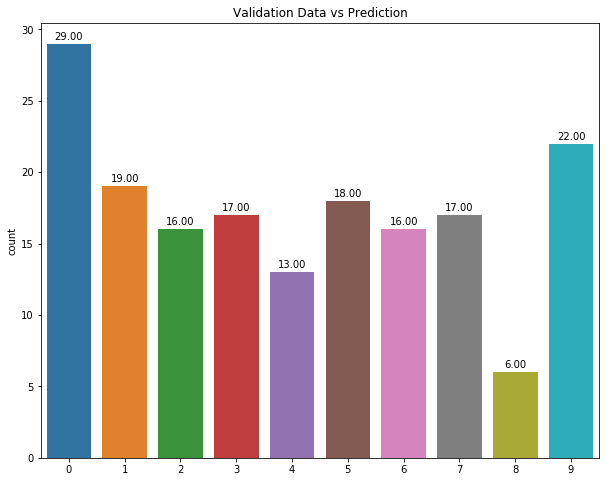

In [59]:
result=[]
for i in range(0,173):
    result.append(np.argmax(model.predict(X_valid[i].reshape(1,img_size,img_size,1))))

    
plt.figure(figsize=(10,8))
plt.title("Validation Data vs Prediction")
ax=sns.countplot(result)    
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +0.3,
            '{:1.2f}'.format(height),
            ha="center") 

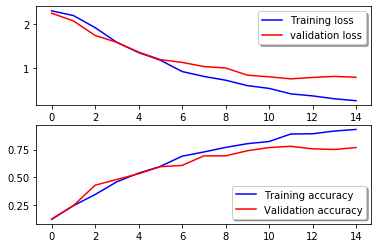

In [52]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(model.history.history['loss'], color='b', label="Training loss")
ax[0].plot(model.history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model.history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(model.history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [24]:
# For predictions
def upload_image(path):  #path to photo which you want to predict
    cropped_face=crop_face(path)
    rgb_weights = [0.2989, 0.5870, 0.1140]
    img_arr_black_and_white = np.dot(cropped_face[...,:3], rgb_weights)
    resized_img=np.array(cv2.resize(img_arr_black_and_white,(img_size,img_size)))
    final_img=resized_img.reshape(1,img_size,img_size,1)
    predicted_array=model.predict(final_img)
    print(Labels[np.argmax(predicted_array)])


In [25]:
upload_image('Danrad.jpg') #Give path here

Daniel
